## Clasification of phishng and benign URLs
* Loading dataset from CSV file
* Data exploration with 2D and 3D plots
* Classification with KNN 
* Drawing a boundary between classes with KNN
* Dimensionality reduction with PCA and t-SNE
* Clustering with k-Means


In [1]:
# Load CSV
import pandas as pd
import numpy as np


filename = 'Examples - Phishing clasification2.csv'

# Specify the names of attributes if the header is not availabel in a CSV file 
#names = ['Registrar', 'Lifetime', 'Country', 'Class']

# Loading with NumPy
#raw_data = open(filename, 'rt')
#data = numpy.loadtxt(raw_data, delimiter=",")

# Loading with Pandas
data = pd.read_csv(filename)
print(data.shape)
#data
#data.dtypes

# Transforming 'object' data to 'categorical' to get numerical (ordinal numbers) representation
data['Registrar'] = data['Registrar'].astype('category')
data['Country'] = data['Country'].astype('category')
data['Protocol'] = data['Protocol'].astype('category')
data['Class'] = data['Class'].astype('category')

data['Registrar_code'] = data['Registrar'].cat.codes
data['Country_code'] = data['Country'].cat.codes
data['Protocol_code'] = data['Protocol'].cat.codes
data['Class_code'] = data['Class'].cat.codes

#data.dtypes
pd.options.display.max_rows=1000
data
#pd.options.display.max_rows=100



(202, 5)


,Registrar,Lifetime,Country,Protocol,Class,Registrar_code,Country_code,Protocol_code,Class_code
0,godaddy,2,US,http,phishing,84,28,0,1
1,XXLPOWER.CO.UA,1,NaN,http,phishing,78,-1,0,1
2,godaddy,2,NaN,http,phishing,84,-1,0,1
3,LOGINCOMPUTERS.IN,1,US,http,phishing,37,28,0,1
4,godaddy,1,US,http,phishing,84,28,0,1
5,"REGISTER.COM, INC.",9,US,http,phishing,59,28,0,1
6,godaddy,2,NaN,http,phishing,84,-1,0,1
7,"PSI-USA, INC. DBA DOMAIN ROBOT",3,Ireland,http,phishing,55,12,0,1
8,PDR LTD. D/B/A PUBLICDOMAINREGISTRY.COM,5,India,http,phishing,54,11,0,1
9,PDR LTD. D/B/A PUBLICDOMAINREGISTRY.COM,4,US,http,phishing,54,28,0,1


In [2]:
X = data[['Registrar_code', 'Lifetime', 'Country_code', 'Protocol_code']].values   #Feature Matrix
y = data['Class_code'].values          #Target Variable

feature_names = data[['Registrar_code', 'Lifetime', 'Country_code', 'Protocol_code']].columns.values
#print(feature_names)
target_names = data['Class'].cat.categories
country_names = data['Country'].cat.categories
registrar_names = data['Registrar'].cat.categories
protocol_names = data['Protocol'].cat.categories
#print(target_names, country_names, registrar_names)


In [3]:
import matplotlib.pyplot as plt

x_index = 1
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: target_names[int(i)])
plt.scatter(X[:, x_index], X[:, y_index], c=y, cmap=plt.cm.get_cmap('Paired', 2))
plt.colorbar(ticks=[0, 1], format=formatter)
plt.clim(-0.5, 1.5)
plt.xlabel(feature_names[x_index])
plt.ylabel(feature_names[y_index]);
plt.show()

<Figure size 640x480 with 2 Axes>

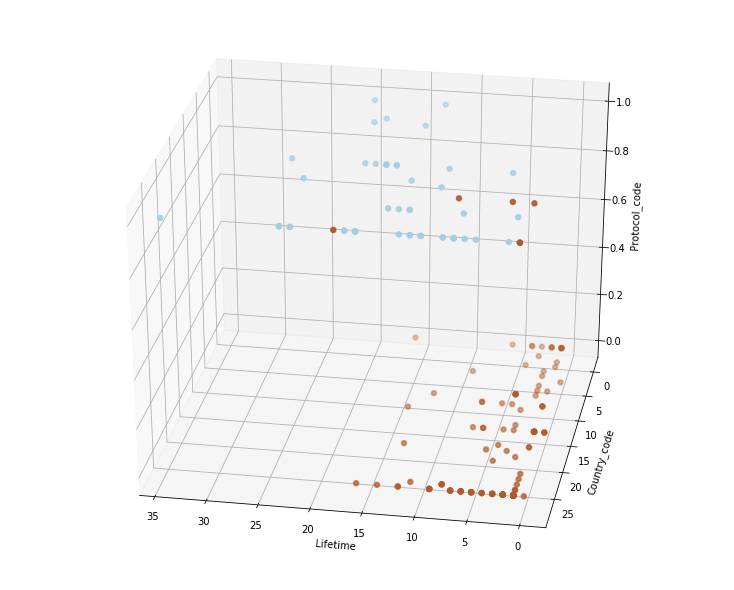

In [4]:
 from mpl_toolkits.mplot3d import Axes3D
    
fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=100)
ax.scatter(X[:, 1], X[:, 2], X[:, 3], lw=2, c=y, cmap='Paired')
ax.set_xlabel(feature_names[1])
ax.set_ylabel(feature_names[2]);
ax.set_zlabel(feature_names[3]);
plt.show()

In [5]:
from sklearn import neighbors

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# call the "predict" method:
registrar_code = 48
lifetime = 2
country_code = 28 
protocol_code = 1

result = knn.predict([[registrar_code, lifetime, country_code, protocol_code],])
#print(target_names)
print(result, target_names[result[0]], ": ", registrar_names[registrar_code], lifetime, country_names[country_code], protocol_names[protocol_code] )

[1] phishing :  NETWORK SOLUTIONS, LLC 2 US https


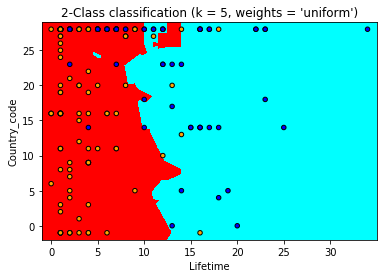

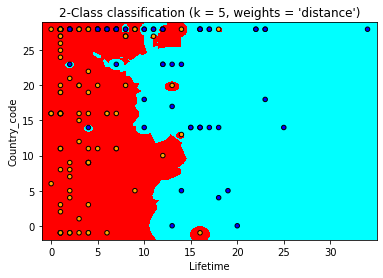

In [6]:
from matplotlib.colors import ListedColormap

n_neighbors = 5
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['cyan', 'red'])
cmap_bold = ListedColormap(['blue', 'orange'])

# Get '1: Lifetime' and '2: Country' attributes only 
x_index = 1
y_index = 2
X2 = X[:,[x_index, y_index]] 

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    knn.fit(X2, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
    y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X2[:, 0], X2[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(feature_names[x_index])
    plt.ylabel(feature_names[y_index]);

plt.show()


### Dimensionality reduction with PCA

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

Reduced dataset shape: (202, 2)


Meaning of the components:
-0.998 x Registrar_code + 0.065 x Lifetime + -0.022 x Country_code + 0.006 x Protocol_code
0.020 x Registrar_code + -0.035 x Lifetime + -0.999 x Country_code + -0.005 x Protocol_code


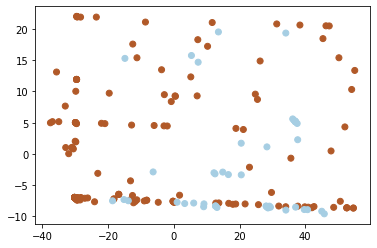

In [8]:
# PCA only
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='Paired')

print("Meaning of the components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component, feature_names)))

### Dimensionality reduction with t-SNE

In [9]:
from sklearn.manifold import TSNE
X_reduced2 = TSNE(n_components=2).fit_transform(X)
# PCA + t-SNE
X_reduced3 = TSNE(n_components=2).fit_transform(X_reduced)
print("Reduced dataset shape:", X_reduced3.shape)

Reduced dataset shape: (202, 2)


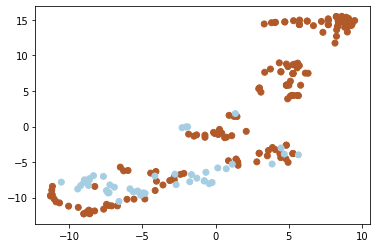

In [10]:
# t-SNE only
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y, cmap='Paired')

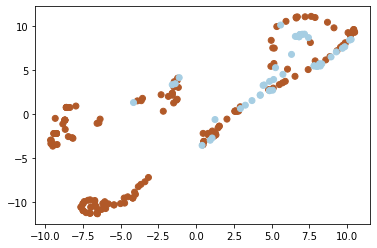

In [11]:
# PCA + t-SNE
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=y, cmap='Paired')

### Clustering: K-means

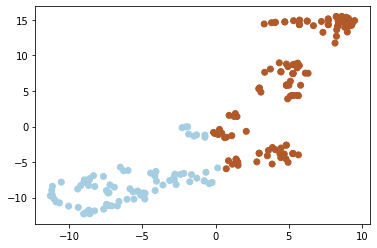

In [12]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y_pred, cmap='Paired');

In [27]:
TP = 0
TN = 0
FP = 0
FN = 0

for i in range (0, len(y)):
    #print(i, ":", y[i])
    if (y[i] == 1): # Positive
        if (y[i] == y_pred[i]):
            TP+=1
        else:
            FN+=1
    else:
        if (y[i] == y_pred[i]):
            TN+=1
        else:
            FP+=1

    
print("TP =", TP, "TN =", TN, "FP =", FP, "FN =", FN) 

TPR = TP / (TP+FN)
TNR = TN / (TN+FP)
FPR = FP / (FP+TN)
FNR = FN / (TP+FN)
PPV = (TP+TN) / (TP+TN+FP+FN)
NPV = TN / (TN+FN)
Fmeasure = 2*PPV*TPR / (PPV + TPR)

print("TPR =", TPR, "TNR =", TNR, "FPR =", FPR, "FNR =", FNR, "PPV =", PPV, "NPV =", NPV, "F-measure =", Fmeasure) 



TP = 110 TN = 41 FP = 7 FN = 44
TPR = 0.7142857142857143 TNR = 0.8541666666666666 FPR = 0.14583333333333334 FNR = 0.2857142857142857 PPV = 0.7475247524752475 NPV = 0.4823529411764706 F-measure = 0.7305273343009193
